In [26]:
import numpy as np
from pylab import mpl, plt

Plot styling


In [27]:
style = 'seaborn-v0_8'
plt.style.use(style)
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

Plotting Function


Variable values used for the plotting and the calculations.


In [28]:
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)

Z = fm((X, Y))
x = X.flatten()
y = Y.flatten()

Plot the data


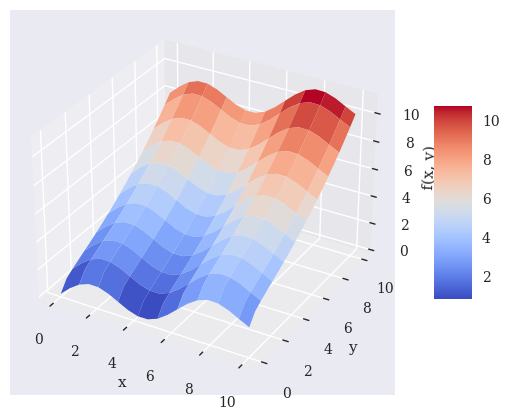

In [29]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')  # Updated to newer API

# Plot the surface
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap='coolwarm', linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Basis functions


In [30]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

Regression step


In [31]:
reg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0]

Regression estimates


In [32]:
RZ = np.dot(matrix, reg).reshape((20, 20))

Plotting the regression surface


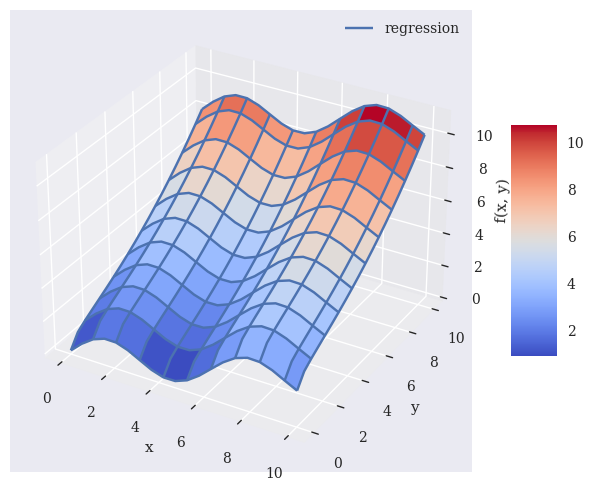

In [34]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)

# Plot the wireframe
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2, label='regression')

# Set labels and legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()

# Add a color bar for the surface
fig.colorbar(surf1, shrink=0.5, aspect=5)

plt.show()